In [1]:
cd /content/drive/MyDrive/AIML/SpamDetection

/content/drive/MyDrive/AIML/SpamDetection


In [20]:
import nltk
nltk.download('stopwords')
import pandas as pd
from nltk.stem import PorterStemmer
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
data = pd.read_csv('SMSSpamCollection.csv', sep ='\t', names=['label', 'messages'])
data.shape

(5572, 2)

In [38]:

corpus = []
ps = PorterStemmer()
for review in data['messages']:
  review = re.sub('[^a-zAz]', ' ', review)
  review = review.lower()
  review = review.split()
  review = [ ps.stem(word) for word in review if not word in set( stopwords.words('english') )]
  review = ' '.join(review)
  corpus.append(review)


In [ ]:
# creating Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X = tf.fit_transform(corpus).toarray()
Y = pd.get_dummies(data['label'])
Y = Y.iloc[:,1]


In [45]:
from sklearn.model_selection import  train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [46]:
# training
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(x_train, y_train)

In [49]:
y_pred = model.predict(x_test)
y_pred.shape

(1393,)

0.9676956209619526


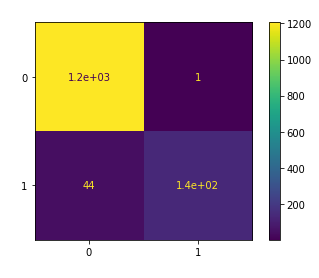

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from matplotlib import pyplot as plt
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
confusion_mat = plot_confusion_matrix(model, x_test, y_test)
confusion_mat.ax_.set_title('Confusion Matrix ', color = 'w')
plt.xlabel('Predicted Label', color = 'w')
plt.ylabel('True Label ', color = 'w')
plt.show()

In [62]:
# using lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
corpus = []
lm = WordNetLemmatizer()
for review in data['messages']:
  review = re.sub('[^a-zAz]', ' ', review)
  review = review.lower()
  review = review.split()
  review = [ lm.lemmatize(word) for word in review if not word in set( stopwords.words('english') )]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X = tf.fit_transform(corpus).toarray()
Y = pd.get_dummies(data['label'])
Y = Y.iloc[:,1]


In [78]:
from sklearn.model_selection import  train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [79]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred.shape

(1393,)

0.964824120603015


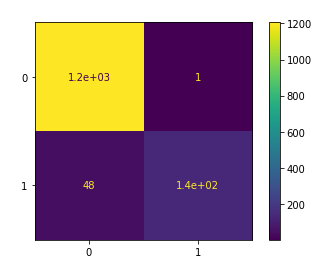

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from matplotlib import pyplot as plt
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
confusion_mat = plot_confusion_matrix(model, x_test, y_test)
confusion_mat.ax_.set_title('Confusion Matrix ', color = 'w')
plt.xlabel('Predicted Label', color = 'w')
plt.ylabel('True Label ', color = 'w')
plt.show()